In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
class Model(object):    #    возвращал массив ошибок на каждой итерации спуска и номер итерации
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [3]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [4]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [6]:
x1 = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML1.2%20multivariate/data/10_x.csv',
                header=None)
y1 = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML1.2%20multivariate/data/10_y.csv',
                header=None)

In [7]:
hyp1 = Model()
steps, errors = hyp.fit(x1, y1)
J1 = hyp.error(x1, y1)
print("error after gradient descent:", J1)

error after gradient descent: 10


In [9]:
data = {'X': [1, 2, 3, 4, 5], 'Y': [2, 4, 5, 4, 5]}
df = pd.DataFrame(data)
model = Model()
steps1, errors1 = model.fit(df['X'], df['Y'], alpha=0.001, max_steps=5000)
model.b0 = 10
model.b1 = 5
steps2, errors2 = model.fit(df['X'], df['Y'], alpha=0.001, max_steps=5000)
model.b0 = -10
model.b1 = -5
steps3, errors3 = model.fit(df['X'], df['Y'], alpha=0.001, max_steps=5000)

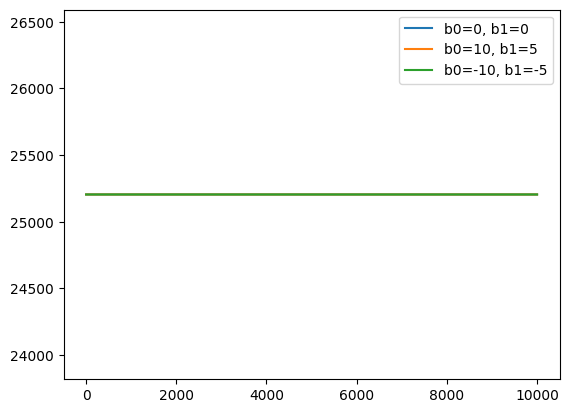

In [10]:
plt.plot(steps1, errors1, label='b0=0, b1=0')
plt.plot(steps2, errors2, label='b0=10, b1=5')
plt.plot(steps3, errors3, label='b0=-10, b1=-5')
plt.legend()
plt.show()

Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [11]:
steps1, errors1 = model.fit(df['X'], df['Y'], alpha=0.001, max_steps=5000)
steps2, errors2 = model.fit(df['X'], df['Y'], alpha=0.01, max_steps=5000)
steps3, errors3 = model.fit(df['X'], df['Y'], alpha=0.1, max_steps=5000)
steps4, errors4 = model.fit(df['X'], df['Y'], alpha=1, max_steps=5000)

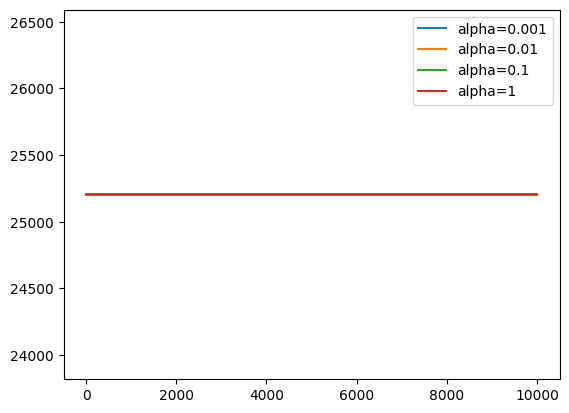

In [12]:
plt.plot(steps1, errors1, label='alpha=0.001')
plt.plot(steps2, errors2, label='alpha=0.01')
plt.plot(steps3, errors3, label='alpha=0.1')
plt.plot(steps4, errors4, label='alpha=1')
plt.legend()
plt.show()

Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [13]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)
        for i in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            if abs(new_err - prev_err) < accuracy:
                break
            prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

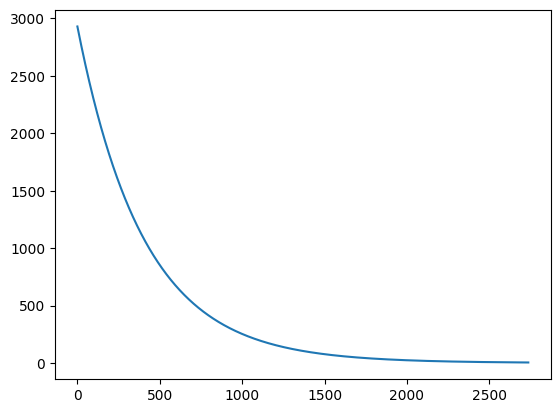

In [16]:
model1=Model()
steps, errors= model1.fit(x, y)
plt.plot(steps,errors)
plt.show()

In [19]:
new_data=pd.Series([4,7,5,3])
model1.predict(new_data)

0    265.099958
1    464.857977
2    331.685964
3    198.513951
dtype: float64

Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [17]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)
        for i in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            if prev_err - new_err < accuracy:
                break
            prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

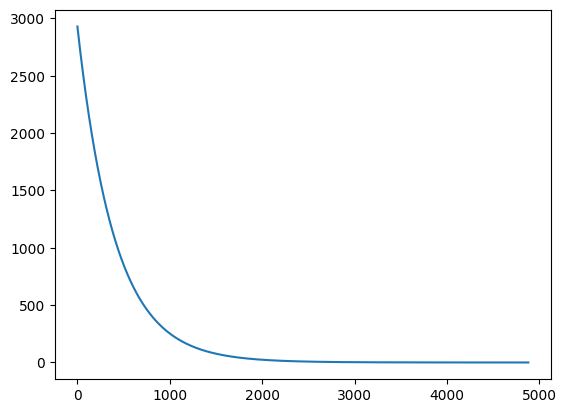

In [20]:
model1=Model()
steps, errors= model1.fit(x, y,accuracy=0.0001)
plt.plot(steps,errors)
plt.show()